# If needed, install

In [1]:
# We will look at Twitter's merger information in this notebook
# Credit: Twitter proxy vote material, 2022

In [2]:
## Uncomment and run if needed
# !pip install tika

# Setting up the libs and data

In [3]:
# Setup and define function for parsing
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [5]:
# Find pdf files in a directory and process its content
import os
import glob

txtfiles = []
inpath = '../common-data/'
outpath = 'data/output/'
count = 0
for file in glob.glob(inpath + '*.PDF'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))

INFO: processing file = Twitter-NPS_513201.PDF
INFO: - in = ../common-data/Twitter-NPS_513201.PDF, out = data/output/Twitter-NPS_513201.PDF.txt
INFO: - reading file = ../common-data/Twitter-NPS_513201.PDF
INFO: - writing file = data/output/Twitter-NPS_513201.PDF.txt
INFO: processed total files = 1


# Word tag cloud for Twitter merger data

In [6]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

In [7]:
# Open file and get content for one as a sanity check
file = 'data/output/Twitter-NPS_513201.PDF.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

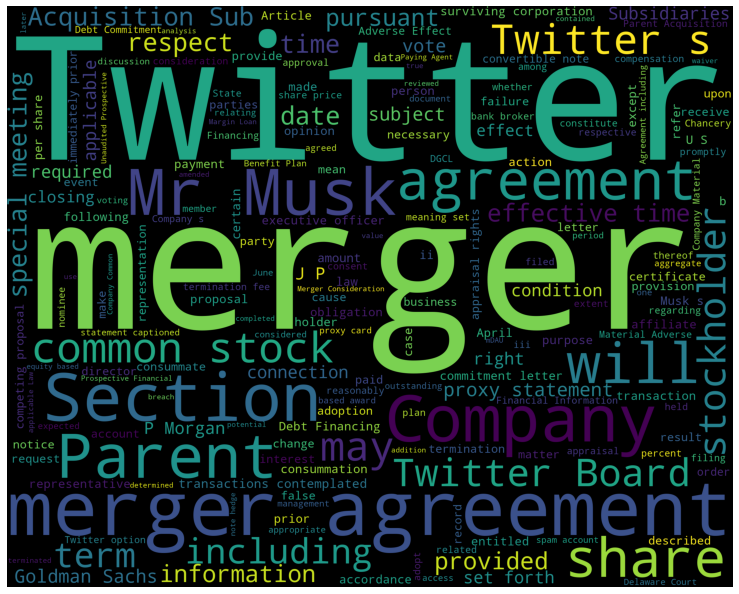

In [8]:
# Draw the visualization
wordcloud_draw(content)

# For advanced analysis
See https://www.datacamp.com/community/tutorials/wordcloud-python